In [1]:
#import all the necessary libraries

import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#import the data from MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Reshape it
x_train = x_train.reshape(60000,784)
x_test  = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')


y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)


In [3]:
#Create a model

model = Sequential([
    Dense(32, input_shape=(784,), activation = 'tanh'),
    Dense(10, activation = "softmax")
])

In [4]:
#Compile the model

model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
#Here we train it

model.fit(x_train,y_train, batch_size=10, epochs=10, shuffle=True, verbose=2,validation_data=(x_test, y_test))


#To see how much accuracy we have and how much of the loss

score = model.evaluate(x_train,y_train)
print('Test loss = ',score[0])
print('Test Accuracy = ', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 7s - loss: 0.6054 - acc: 0.8118 - val_loss: 0.4025 - val_acc: 0.8785
Epoch 2/10
 - 6s - loss: 0.3986 - acc: 0.8808 - val_loss: 0.3597 - val_acc: 0.8916
Epoch 3/10
 - 6s - loss: 0.3756 - acc: 0.8870 - val_loss: 0.3781 - val_acc: 0.8857
Epoch 4/10
 - 7s - loss: 0.3621 - acc: 0.8909 - val_loss: 0.3482 - val_acc: 0.8962
Epoch 5/10
 - 7s - loss: 0.3469 - acc: 0.8957 - val_loss: 0.3302 - val_acc: 0.9019
Epoch 6/10
 - 7s - loss: 0.3429 - acc: 0.8971 - val_loss: 0.3288 - val_acc: 0.9041
Epoch 7/10
 - 7s - loss: 0.3370 - acc: 0.8984 - val_loss: 0.3270 - val_acc: 0.9020
Epoch 8/10
 - 7s - loss: 0.3375 - acc: 0.8978 - val_loss: 0.3268 - val_acc: 0.9030
Epoch 9/10
 - 7s - loss: 0.3293 - acc: 0.9001 - val_loss: 0.3210 - val_acc: 0.9037
Epoch 10/10
 - 7s - loss: 0.3247 - acc: 0.9022 - val_loss: 0.3246 - val_acc: 0.8998
60000/60000 [==============================] - 1s 20us/step
Test loss =  0.3240788378904263
Test Accuracy =  0.90211666

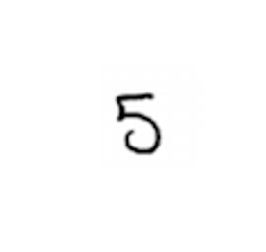

In [6]:
#Import the image from the link: https://goo.gl/gqzFvm

img_brg = cv2.imread('image.jpg',cv2.IMREAD_COLOR)

img_rbg = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)

plt.imshow(img_rbg), plt.axis("off")
plt.show()

In [7]:
# Reshape it and give it to our model

img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

img_resized = img.resize(28,28)

img_reshaped = img.reshape(1,784)

In [8]:
#Predict the digit from image

prediction = model.predict(img_reshaped)

print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [0.00939282 0.00053699 0.2556081  0.20649835 0.00087867 0.50851315
 0.00766596 0.00700735 0.00323247 0.00066608]

Thresholded Score:
 [0 0 0 0 0 1 0 0 0 0]

Predicted Digit:
 5
